In [18]:
import requests as req
import re
from bs4 import BeautifulSoup as bs
import time as ti
import pandas as pd
import csv

def link(url):
    header = {
        "User-Agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.122 Safari/537.36",
        "Cookie": "__mta=209483309.1633872307881.1635784296675.1635784301689.135; __mta=209483309.1633872307881.1635784301689.1636118269489.136; _lxsdk_cuid=17c6a60e5ffc8-0d29385782149-b7a1438-240000-17c6a60e5ffc8; __mta=209483309.1633872307881.1635784208814.1635784214144.122; uuid_n_v=v1; uuid=C20727103E0511EC912F0324DFD0929D281847B2245642ED91BB7FD695E02AB0; _csrf=080ec452fa56b4bb7d615d4a1463e1c55b501b910f59055526f02989d528b063; _lxsdk=C20727103E0511EC912F0324DFD0929D281847B2245642ED91BB7FD695E02AB0; _lxsdk_s=17cf03e646b-f7-69a-b95%7C%7C19"    
    }
    # 使用前更换Cookie，等验证中心出现后的输入cookie     
    res = req.get(url,headers = header)
    if res.status_code == 200:
        return bs(res.text,"lxml")
    return None


def dic_to_csv(dic_data):
    pd.DataFrame(dic_data).to_csv('compdata.csv')

data = []
for i in range(0,100,10):
    url = "https://maoyan.com/board/4?offset=" + str(i)
    movies = link(url).find_all("dd")
    for i in movies:
        num = i.find("i").text
        name = i.find("a").get("title")
        actor = re.findall("主演：(.*)",i.find("p",class_ = "star").text)[0]
        when = re.findall("上映时间：(.*)",i.find("p",class_ = "releasetime").text)[0]
        score = i.find("i",class_ = "integer").text + i.find("i",class_ = "fraction").text
        url1 = "https://maoyan.com" + i.find("p",class_ = "name").a.get("href")
        Type = link(url1).find_all("li",class_="ellipsis")[0].find_all("a",class_="text-link")
        ktype = ""
        for i in Type:
            ktype = ktype + i.text
        director = re.findall("      (.*)",link(url1).find("div",class_="info").text)[0]
        if not link(url1).find_all("div",class_="mbox-name"):
            box= None
        else:
            box = link(url1).find_all("div",class_="mbox-name")[2].text
        country = link(url1).find_all("li",class_="ellipsis")[1].text
        country = country.split("/")
        place = country[0].replace("\n","")
        duration = country[1].replace("\n","")

        s = [num,name,score,ktype,actor,director,place,when,box,duration]
        data.append(s)


In [49]:
with open("Yichen_Lei_1822302.csv", 'a', newline='', encoding='utf-8-sig') as f:
    f_csv = csv.writer(f)
    f_csv.writerow(("Number","Title","Rating","Type","Actors","Director","Country","Release","Box","Duration")) # 头部信息
    f_csv.writerows(data)

In [19]:
print(data[40:50])

[['41', '疯狂动物城', '9.5', ' 动画  动作  冒险 ', '金妮弗·古德温,杰森·贝特曼,伊德瑞斯·艾尔巴', '拜伦·霍华德', '        美国          ', '2016-03-04', '153190', ' 109分钟        '], ['42', '机器人总动员', '9.3', ' 喜剧  科幻  动画 ', '本·贝尔特,艾丽莎·奈特,杰夫·格尔林', '安德鲁·斯坦顿', '        美国          ', '2008-06-27(美国)', None, ' 98分钟        '], ['43', '复仇者联盟4：终局之战', '9.1', ' 动作  冒险  奇幻 ', '小罗伯特·唐尼,克里斯·埃文斯,马克·鲁法洛', '乔·罗素', '        美国          ', '2019-04-24', '425013', ' 181分钟        '], ['44', '末代皇帝', '8.8', ' 剧情 ', '尊龙,陈冲,彼得·奥图尔', '贝纳尔多·贝托鲁奇', '        英国,意大利,中国大陆,法国,美国          ', '1987-10-04(日本)', '暂无', ' 163分钟        '], ['45', '西西里的美丽传说', '8.2', ' 剧情  爱情  战争 ', '莫妮卡·安娜·玛丽亚·贝鲁奇,朱塞佩·苏尔法罗,玛蒂尔德·皮亚纳', '朱塞佩·托纳多雷', '        美国，意大利          ', '2000-10-26(意大利)', None, ' 109分钟        '], ['46', '心灵奇旅', '9.2', ' 动画  喜剧  冒险 ', '杰米·福克斯,蒂娜·菲,菲利西亚·拉斯海德', '彼特·道格特', '        美国          ', '2020-12-25', '37618', ' 101分钟        '], ['47', '让子弹飞', '8.5', ' 剧情  喜剧  动作  西部 ', '姜文,周润发,葛优', '姜文', '        中国大陆,中国香港          ', '2010-12-16', '63675', ' 132分钟      

In [1]:
import numpy as np # imports a fast numerical programming library
import scipy as sp #imports stats functions, amongst other things
import matplotlib as mpl # this actually imports matplotlib
import matplotlib.cm as cm #allows us easy access to colormaps
import matplotlib.pyplot as plt #sets up plotting under plt
import pandas as pd #lets us handle data as dataframes
import seaborn as sns
#sets up pandas table display
mpl.rcParams['font.sans-serif'] = ['SimHei', 'FangSong']  # 汉字字体,优先使用楷体，如果找不到楷体，则使用黑体
mpl.rcParams['font.size'] = 12  # 字体大小
mpl.rcParams['axes.unicode_minus'] = False  # 正常显示负号

pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

In [2]:
df = pd.read_csv("Yichen_Lei_1822302.csv", encoding='utf-8')

#Examine the first few rows of the dataframe
df

,Number,Title,Rating,Type,Actors,Director,Country,Release,Box,Duration
0,1,我不是药神,9.6,剧情 喜剧,"徐峥,周一围,王传君",文牧野,中国大陆,2018/7/5,310002,117分钟
1,2,肖申克的救赎,9.5,剧情 犯罪,"蒂姆·罗宾斯,摩根·弗里曼,鲍勃·冈顿",弗兰克·德拉邦特,美国,1994-09-10(加拿大),NaN,142分钟
2,3,绿皮书,9.5,剧情 喜剧 传记,"维果·莫腾森,马赫沙拉·阿里,琳达·卡德里尼",彼得·法雷里,美国,2019/3/1,47872,130分钟
3,4,海上钢琴师,9.3,剧情 爱情 音乐,"蒂姆·罗斯,比尔·努恩 ,克兰伦斯·威廉姆斯三世",朱塞佩·托纳多雷,意大利,2019/11/15,14376,126分钟
4,5,哪吒之魔童降世,9.6,动画 喜剧 奇幻,"吕艳婷,囧森瑟夫,瀚墨",饺子,中国大陆,2019/7/26,503570,110分钟
...,...,...,...,...,...,...,...,...,...,...
95,96,饮食男女,8.8,剧情 家庭,"郎雄,吴倩莲,杨贵媚",李安,"中国台湾,美国",1994-08-03(美国),暂无,124分钟
96,97,网络谜踪,8.6,剧情 悬疑 犯罪,"约翰·赵,米切尔·拉,黛博拉·梅辛",阿尼什·查甘蒂,美国,2018/12/14,3049,102分钟
97,98,致命魔术,8.8,剧情 悬疑 惊悚,"休·杰克曼,克里斯蒂安·贝尔,迈克尔·凯恩",克里斯托弗·诺兰,"美国,英国",2006-10-17(意大利),暂无,130分钟
98,99,模仿游戏,9.3,剧情 战争 传记,"本尼迪克特·康伯巴奇,凯拉·奈特莉,马修·古迪",莫滕·泰杜姆,英国,2015/7/21,5247,114分钟


C:\Users\79149\AppData\Local\Temp/ipykernel_22176/1291639210.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  year_data = pd.Series()  #make a series


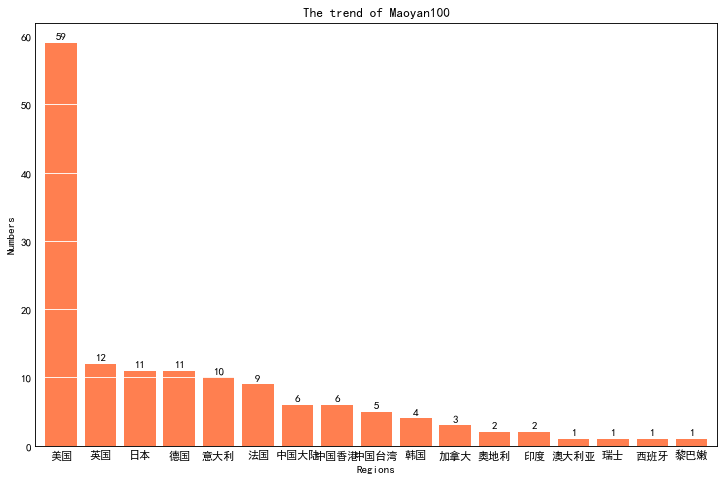

In [3]:
year_data = pd.Series()  #make a series
for i,item in df.iterrows():   
    name_of_country = item['Country'].split(',')[0] #split the "," out of the string
    name_of_country = name_of_country.strip()
    dict_obj = {}   
    dict_obj['Country'] = name_of_country
    year_df = pd.Series(dict_obj)  
    year_data = year_data.append(year_df) 
    for i in range(1,5):
        if(len(item['Country'].split(','))>i):
            name_of_country = item['Country'].split(',')[1]
            name_of_country = name_of_country.strip()
            name_of_country = name_of_country.strip()
            dict_obj = {}   
            dict_obj['Country'] = name_of_country
            year_df = pd.Series(dict_obj)  
            year_data = year_data.append(year_df) 

year_num = year_data.groupby('Country').count().sort_values(ascending=False)
mpl.rcParams['font.size'] = 10  # font size

plt.figure(figsize=(11,7),dpi = 80)    
sns.despine(left=True, bottom=True)
year_num.plot(kind='bar',color='coral',width = 0.8) 
plt.xticks(rotation=0)
plt.ylabel('Numbers')
plt.xlabel('Regions') 
plt.title('The trend of Maoyan100')
for x,y in enumerate(year_num):   
    plt.text(x,y+0.5,y,ha='center')
ax = plt.gca()
plt.grid(axis = 'y', color ='white', linestyle='-')
ax.tick_params(axis='both', which='both',length=0)
plt.savefig("every_countries.png")
plt.show()


In [4]:
df["Release"] = df["Release"].str[:4]



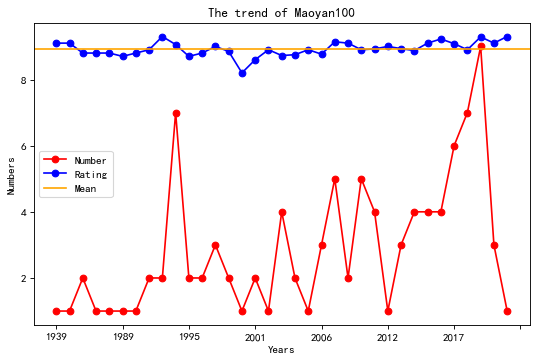

In [5]:
    year1 = df.groupby('Release').Number.count()
    year2 = df.groupby("Release").Rating.mean()
    plt.figure(figsize=(8,5),dpi = 80)
    year1.plot(kind = 'line',color='red',marker='o') 
    year2.plot(kind = 'line',color='blue',marker='o') 
    plt.legend
    plt.axhline(year2.mean(), color='orange', label='Mean')
    plt.ylabel('Numbers')
    plt.xlabel('Years') 
    plt.title('The trend of Maoyan100')
    plt.legend()
    plt.savefig('Overall_trend.jpg')

D:\InstallPath\anaconda\envs\int\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
D:\InstallPath\anaconda\envs\int\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


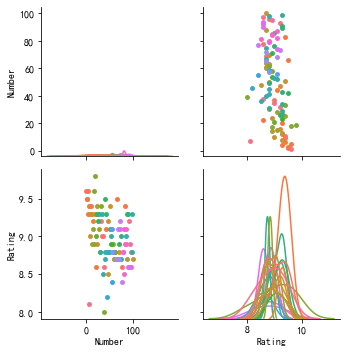

In [6]:
g = sns.PairGrid(df, vars=['Number', 'Rating'], hue="Release")
g.map_diag(sns.kdeplot)
g.map_offdiag(plt.scatter, s=15)

In [7]:
# top5_movies = df.sort_values('Rating',ascending=False)
# name = top5_movies['Title'][:5]
# score = top5_movies['Rating'][:5]
# plt.figure(figsize=(10,8),dpi = 80) 
# plt.bar(range(5),score,width=0.6,color='coral')
# plt.xticks(range(5),name,rotation=0)
# plt.ylim((9,10))   #设置y轴坐标
# plt.ylabel('Rating')
# plt.xlabel('Name') 
# plt.title('Top5 of Maoyan')
# for x,y in enumerate(list(score)):   
#     plt.text(x,float(y)+0.01,y,ha='center')
# #plt.show()
# plt.savefig('TOP5.jpg')

C:\Users\79149\AppData\Local\Temp/ipykernel_14656/3614405494.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  typesd = pd.Series()  #创建一个Series对象，用于后面赋值


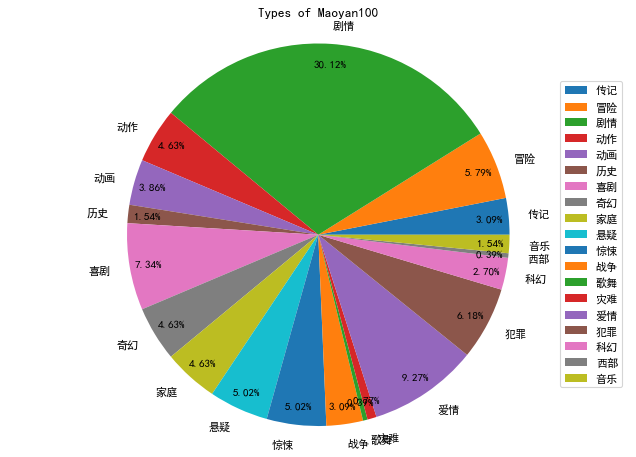

In [246]:
typesd = pd.Series()  #创建一个Series对象，用于后面赋值
for i,item in df.iterrows():   #遍历每一行
    name_of_country = item['Type'].split(' ')[1]
#     print(len(item["Type"]))
    dict_obj = {}   #创建一个空字典
    dict_obj['Type'] = name_of_country

    year_df = pd.Series(dict_obj)  
    typesd = typesd.append(year_df) 
    if(len(item['Type'])>4):
        name_of_country = item['Type'].split(' ')[3]
        dict_obj = {}   #创建一个空字典
        dict_obj['Type'] = name_of_country
        year_df = pd.Series(dict_obj)  
        typesd = typesd.append(year_df)
    if(len(item['Type'])>8):
        name_of_country = item['Type'].split(' ')[5]
        dict_obj = {}   #创建一个空字典
        dict_obj['Type'] = name_of_country
        year_df = pd.Series(dict_obj)  
        typesd = typesd.append(year_df) 
    if(len(item['Type'])>12):
        name_of_country = item['Type'].split(' ')[7]
        dict_obj = {}   #创建一个空字典
        dict_obj['Type'] = name_of_country
        year_df = pd.Series(dict_obj)  
        typesd = typesd.append(year_df) 
type1 = typesd.groupby('Type').count()
plt.figure(figsize=(10,7),dpi = 80)
type1.plot(kind='pie',autopct='%.2f%%', pctdistance=0.9) 
plt.title('Types of Maoyan100')
plt.legend(loc='center right')
plt.axis('equal')
plt.ylabel("")
plt.savefig('Types.jpg')
plt.show()

In [113]:
sns.set()

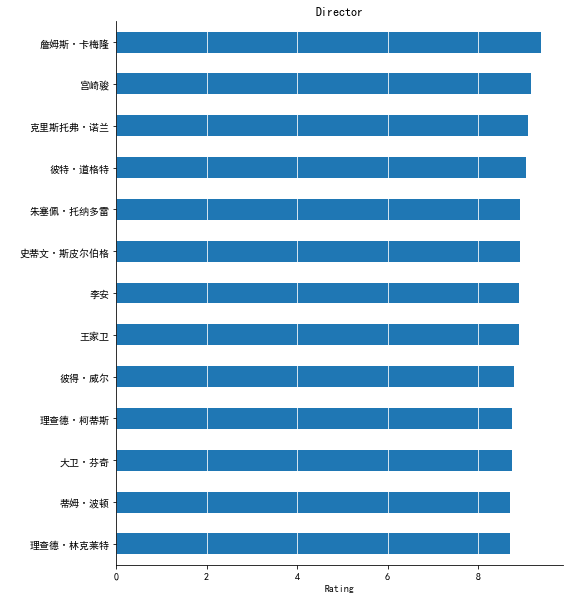

In [9]:
a =df.groupby('Director')
us = a.filter(lambda x: len(x) > 1)
plt.figure(figsize=(8, 10))
ai = us.groupby('Director').Rating.mean().sort_values()
ai.plot(kind="barh")
plt.grid(axis = 'x', color ='white', linestyle='-')
plt.ylabel('   ') 
plt.xlabel('Rating') 

plt.title('Director')
sns.despine()
plt.savefig("Direc.png")


D:\InstallPath\anaconda\envs\int\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


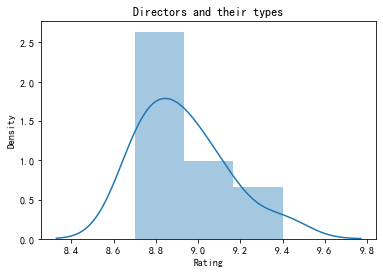

In [10]:
sns.distplot(ai);
plt.title('Directors and their types')

plt.savefig("Direc_Type_des.png")

In [11]:
# df_short=df[["Director", "Rating","Number"]]
# sns.pairplot(df_short, size=2.5)

In [12]:
box_dir = df[df.Box.notnull()]
box_dir = box_dir[box_dir.Box != "暂无"]
box_dir.Box.describe()

count         41
unique        41
top       310002
freq           1
Name: Box, dtype: object

In [13]:
df= df.astype(str)
df["Duration"] = df["Duration"].map(lambda date_str: date_str[:-10])
df

,Number,Title,Rating,Type,Actors,Director,Country,Release,Box,Duration
0,1,我不是药神,9.6,剧情 喜剧,"徐峥,周一围,王传君",文牧野,中国大陆,2018,310002,117
1,2,肖申克的救赎,9.5,剧情 犯罪,"蒂姆·罗宾斯,摩根·弗里曼,鲍勃·冈顿",弗兰克·德拉邦特,美国,1994,nan,142
2,3,绿皮书,9.5,剧情 喜剧 传记,"维果·莫腾森,马赫沙拉·阿里,琳达·卡德里尼",彼得·法雷里,美国,2019,47872,130
3,4,海上钢琴师,9.3,剧情 爱情 音乐,"蒂姆·罗斯,比尔·努恩 ,克兰伦斯·威廉姆斯三世",朱塞佩·托纳多雷,意大利,2019,14376,126
4,5,哪吒之魔童降世,9.6,动画 喜剧 奇幻,"吕艳婷,囧森瑟夫,瀚墨",饺子,中国大陆,2019,503570,110
...,...,...,...,...,...,...,...,...,...,...
95,96,饮食男女,8.8,剧情 家庭,"郎雄,吴倩莲,杨贵媚",李安,"中国台湾,美国",1994,暂无,124
96,97,网络谜踪,8.6,剧情 悬疑 犯罪,"约翰·赵,米切尔·拉,黛博拉·梅辛",阿尼什·查甘蒂,美国,2018,3049,102
97,98,致命魔术,8.8,剧情 悬疑 惊悚,"休·杰克曼,克里斯蒂安·贝尔,迈克尔·凯恩",克里斯托弗·诺兰,"美国,英国",2006,暂无,130
98,99,模仿游戏,9.3,剧情 战争 传记,"本尼迪克特·康伯巴奇,凯拉·奈特莉,马修·古迪",莫滕·泰杜姆,英国,2015,5247,114


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Number    100 non-null    object
 1   Title     100 non-null    object
 2   Rating    100 non-null    object
 3   Type      100 non-null    object
 4   Actors    100 non-null    object
 5   Director  100 non-null    object
 6   Country   100 non-null    object
 7   Release   100 non-null    object
 8   Box       100 non-null    object
 9   Duration  100 non-null    object
dtypes: object(10)
memory usage: 7.9+ KB


In [15]:
df['Duration'] = df['Duration'].astype("int")
df['Rating'] =df['Rating'].astype("float64")


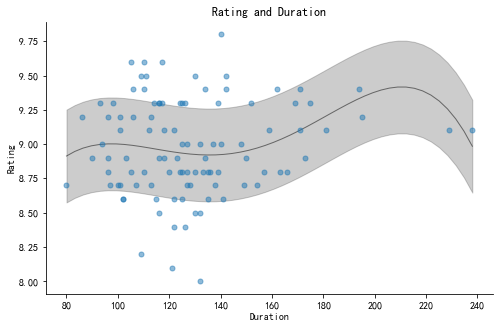

In [16]:
x = df.Duration
y = df.Rating
params = np.polyfit(x, y, 4)
xp = np.linspace(x.min(), x.max())
yp = np.polyval(params, xp)
plt.figure(figsize=(8, 5))

plt.plot(xp, yp, 'k', alpha=0.5, linewidth=1)
plt.plot(x, y, 'o', markersize=5, alpha=0.5)
sig = np.std(y - np.polyval(params, x))
plt.fill_between(xp, yp - sig, yp + sig, color='k', alpha=0.2)
plt.ylabel('Rating') 
plt.xlabel('Duration') 

plt.title('Rating and Duration')
sns.despine()
plt.savefig("D&A.png")